In [1]:
%matplotlib inline
import numpy
import pandas
from decimal import Decimal
import itertools
from pprint import pprint

import common

from matplotlib import pyplot as plt
import matplotlib

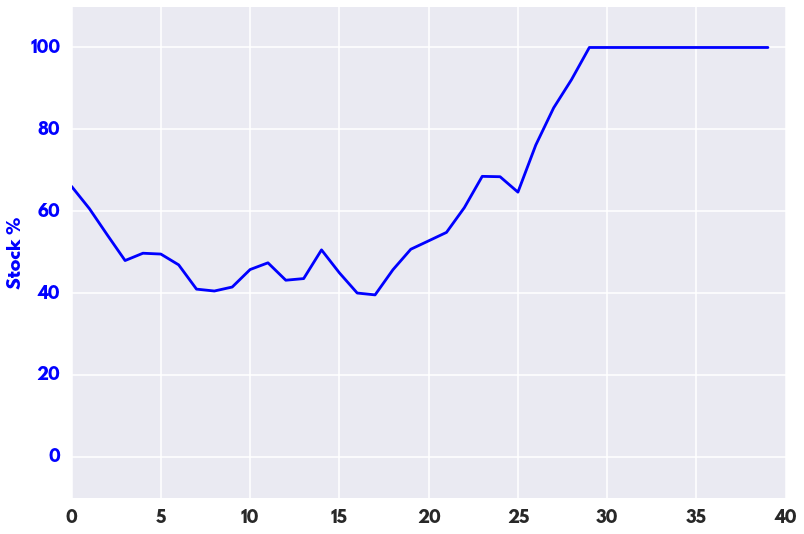

In [10]:
data_series = common.Returns_US_1871()

YEAR = 1949
LENGTH = 40

(s1, s2) = itertools.tee(data_series.iter_from(YEAR))
x = common.simulate_withdrawals(s1, years=LENGTH)
y = common.simulate_withdrawals(s2, years=LENGTH, harvesting=common.N_60_RebalanceHarvesting)

#(s1, s2) = itertools.tee(common.low_returns(stocks=Decimal('.04'), bonds=Decimal('.10')))
#x = common.simulate_withdrawals(s1, years=LENGTH)
#y = common.simulate_withdrawals(s2, years=LENGTH, harvesting=common.RebalanceHarvesting)

#x = common.simulate_withdrawals(common.big_drop(), years=LENGTH)
#y = common.simulate_withdrawals(common.big_drop(), years=LENGTH, harvesting=common.RebalanceHarvesting)

fig, ax1 = plt.subplots()
ax1.plot([n.portfolio_stocks / n.portfolio_n * 100 for n in x], 'b')
ax1.set_ylabel('Stock %', color='b')
ax1.set_ylim([-10, 110])
for tl in ax1.get_yticklabels():
    tl.set_color('b')

plt.show()

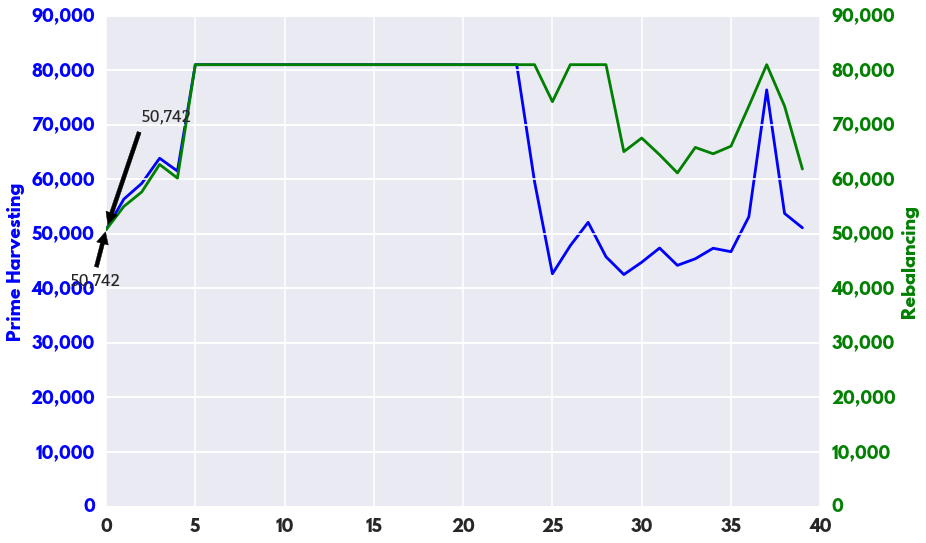

In [11]:
fig, ax1 = plt.subplots()
ax1.plot([n.withdraw_r for n in x], 'b')
ax1.set_ylabel('Prime Harvesting', color='b')
ax1.set_ylim([0, 90000])
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax1.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2 = ax1.twinx()
income = [n.withdraw_r for n in y]
ax2.plot(income, 'g')
ax2.set_ylabel('Rebalancing', color='g')
ax2.set_ylim([0, 90000])
for tl in ax2.get_yticklabels():
    tl.set_color('g')
    
ax2.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

min_income_index = income.index(min(income))
ax2.annotate("{:,}".format(int(income[0])), xy=(0, income[0]),
             xytext=(0 + 2, income[0] + 20000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontname='Bitter',
             fontsize=16)
ax2.annotate("{:,}".format(int(min(income))), xy=(min_income_index, min(income)),
             xytext=(min_income_index - 2, min(income) - 10000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontname='Bitter',
             fontsize=16)
plt.xlabel('Year of Retirement')

plt.show()

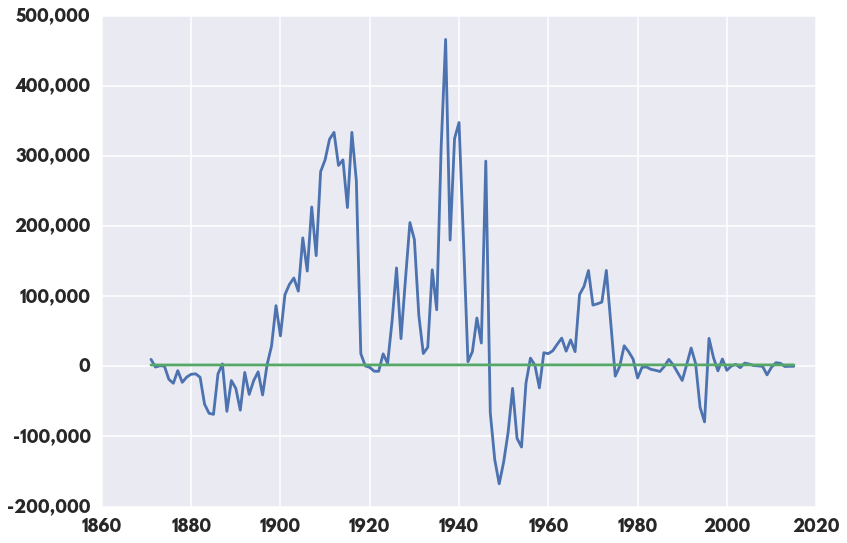

In [12]:
data_series = common.Returns_US_1871()

diff = []

for i in range(data_series.years_of_data):
    year = i + 1871
    YEARS = 30
    p = (600000,400000)

    (s1, s2) = itertools.tee(data_series.iter_from(year))
    x = common.simulate_withdrawals(s1, years=YEARS, portfolio=p)
    y = common.simulate_withdrawals(s2, years=YEARS, harvesting=common.N_60_RebalanceHarvesting, portfolio=p)
    
    prime_income = sum([n.withdraw_r for n in x])
    rebalance_income = sum([n.withdraw_r for n in y])
    
    diff.append((prime_income - rebalance_income, year))

plt.subplot(111).yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#pprint(sorted(diff))
plt.plot(range(1871, 1871 + len(diff)), diff)

(-50000, 1000000)

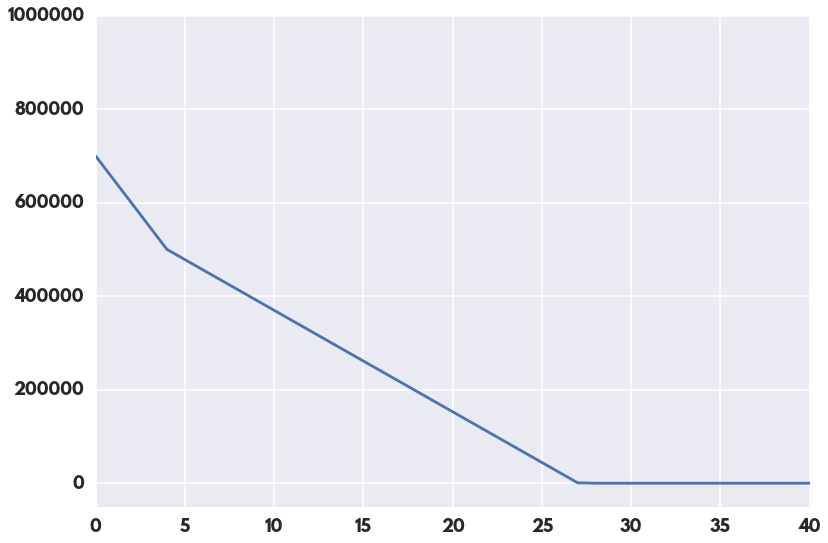

In [15]:
data_series = common.Returns_US_1871()
x = common.simulate_lmp(common.nirp_returns(), lmp_real_annual=Decimal('0'), portfolio=(750000,0))
plt.plot([n.portfolio_r for n in x])
plt.ylim([-50000,1000000])

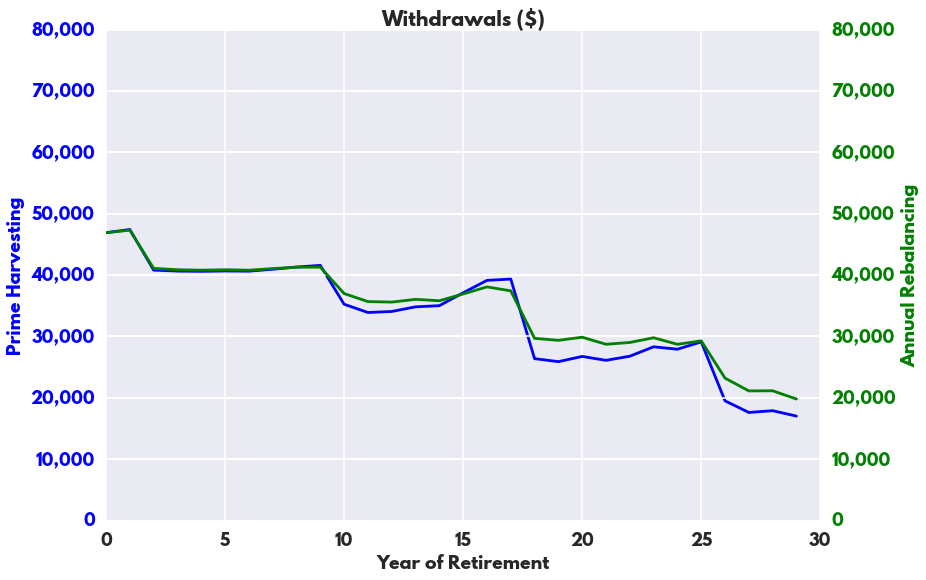

In [24]:
def r():
    yield common.AnnualChange(year=1, stocks=Decimal('.08'), bonds=Decimal('.02'), inflation=Decimal('0'))
    yield common.AnnualChange(year=2, stocks=Decimal('.08'), bonds=Decimal('.02'), inflation=Decimal('0'))
    yield common.AnnualChange(year=3, stocks=Decimal('-.3'), bonds=Decimal('.02'), inflation=Decimal('0'))
    yield common.AnnualChange(year=4, stocks=Decimal('0'), bonds=Decimal('.02'), inflation=Decimal('0'))
    for i in range(3):
        yield common.AnnualChange(year=5, stocks=Decimal('.06'), bonds=Decimal('.02'), inflation=Decimal('0'))
    for i in range(1):
        yield common.AnnualChange(year=6, stocks=Decimal('.10'), bonds=Decimal('.02'), inflation=Decimal('0'))

(r1, r2) = itertools.tee(itertools.cycle((x for x in r())))
x = common.simulate_withdrawals(r1, years=30)
y = common.simulate_withdrawals(r2, harvesting=common.N_60_RebalanceHarvesting, years=30)
s1 = [n.withdraw_r for n in x]
s2 = [n.withdraw_r for n in y]
common.plot_two_series(s1, s2, s1_title='Prime Harvesting', s2_title='Annual Rebalancing',
                       range=[0,80000],
                       x_label='Year of Retirement', title='Withdrawals ($)')